# Experiment 1

Uniformly distributed $x_i$.

$$
\begin{align}
f(X) & = A \cdot X + b; \\ 
m & = 4; \\
s & = 0; \\
Z & = N(0, \sigma^2).
\end{align}
$$

This is an experiment that linear regression should be
very good at. $F$ is a linear function of $X$, there are a small number of
features, no confounding features, and normally distributed noise. If the
world was all like this, we would have no need for anything other than 
linear regression.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import impactstudy.experiment as ise

## Configuration

In [2]:
N = 250

In [3]:
M = 4

In [4]:
S = 0

In [5]:
SIGMA = np.arange(0.0, 101.0, 20.0)

## A Single Scenario For Manual Verification.

### Set Up the Scenario

In [6]:
experiment0 = ise.LinearWithNoiseExperiment(m=M, s=S, sigma=SIGMA[1])

### Generate Impact Charts

In [7]:
tags, scenario = next(experiment0.scenarios())

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


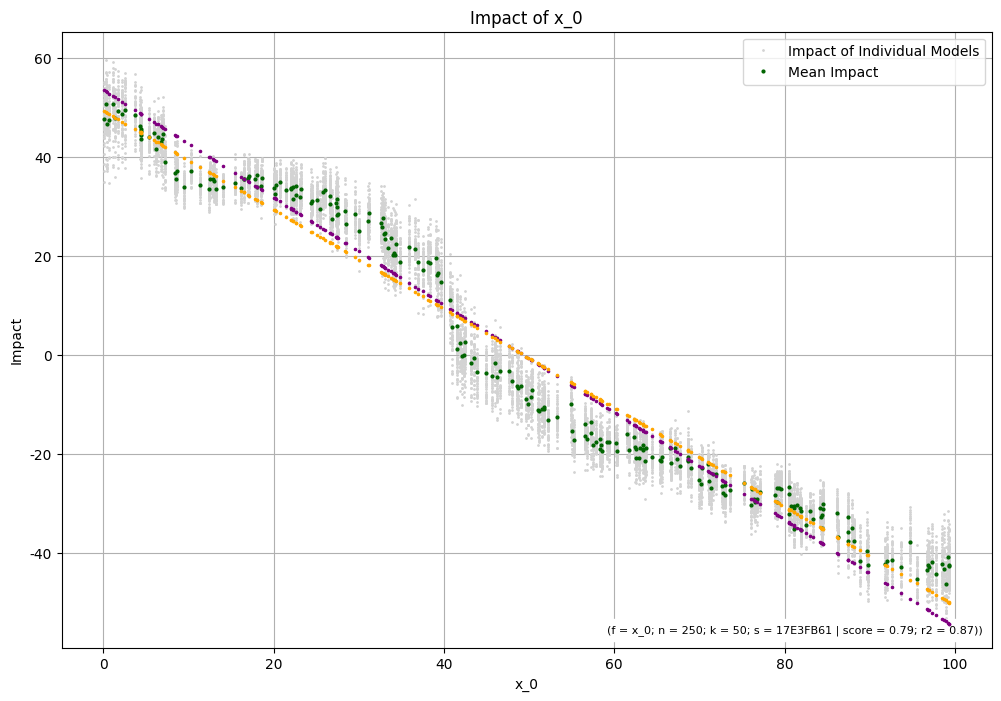

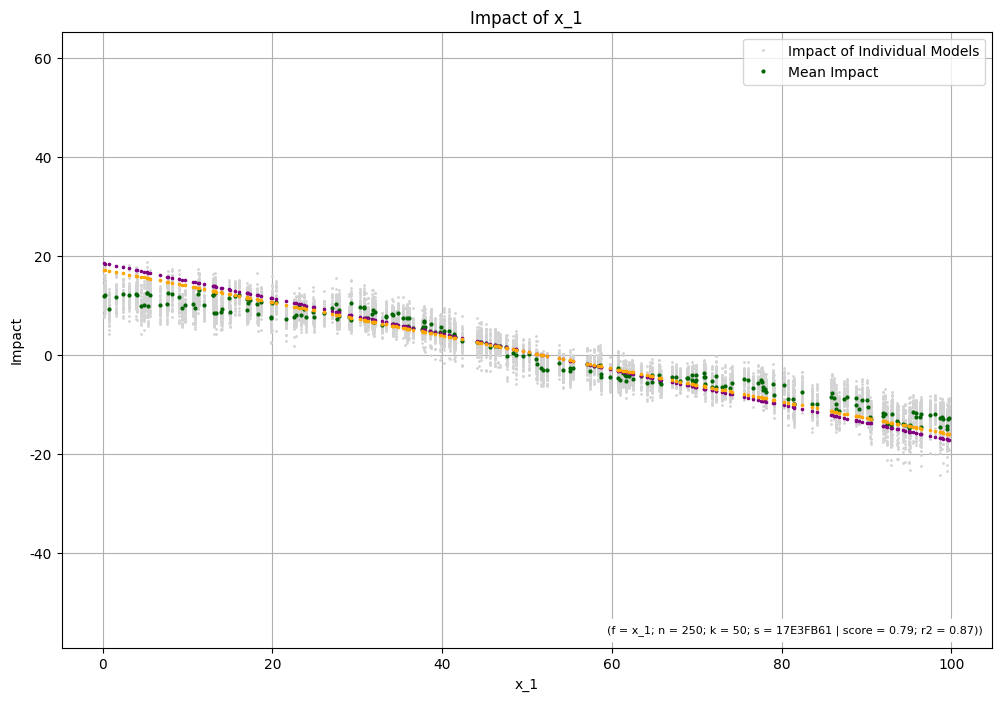

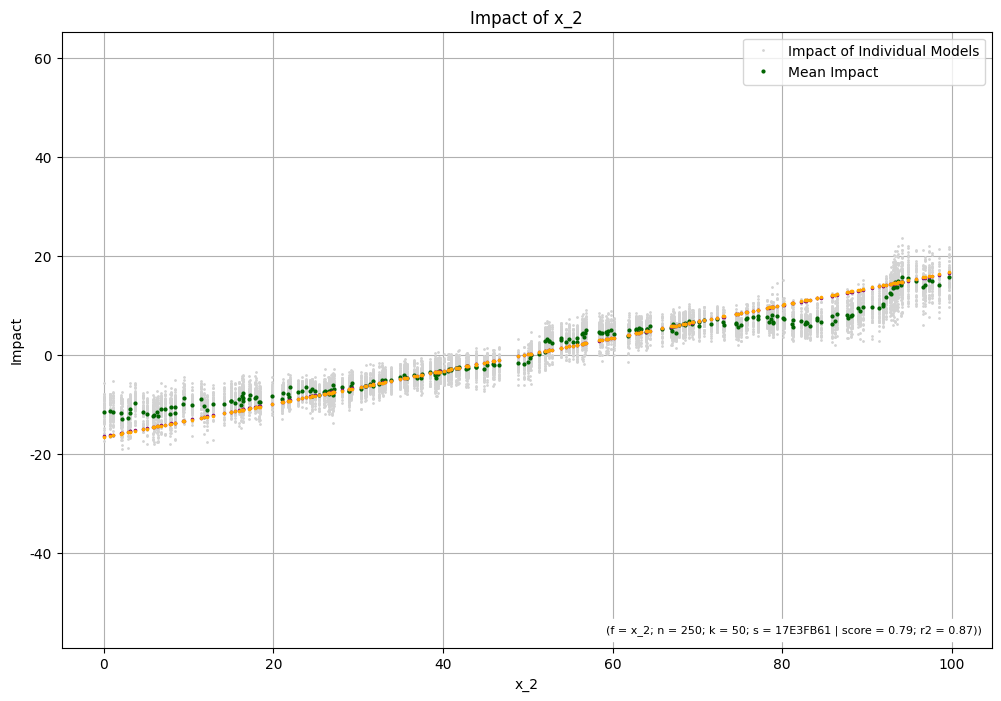

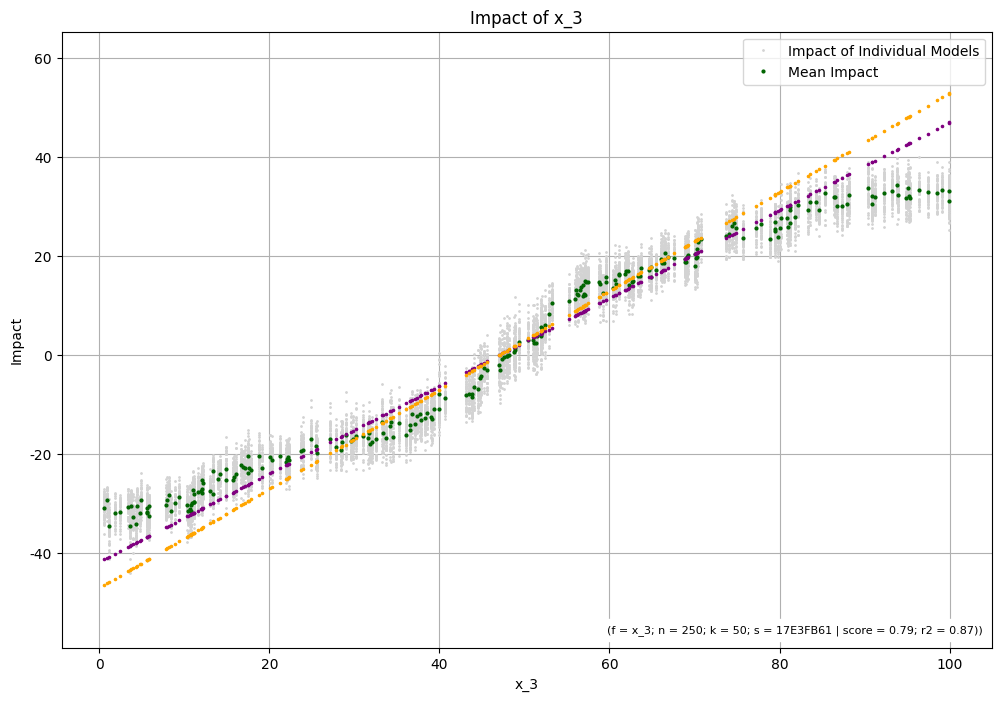

In [8]:
impact_charts = scenario.model_impact_charts(N, linreg_overlay=True)

### Generate Metrics

In [9]:
scenario.model_errors(N, linreg_errors=True)

,metric,x_0,x_1,x_2,x_3,mu_x_i
0,RMSE,5.576162,2.152630,2.192297,6.831017,4.188027
0,MAE,4.769715,1.637815,1.632532,5.213466,3.313382
0,MED_AE,4.838036,1.273163,1.233865,4.144531,2.872399
0,LR_RMSE,2.398173,0.729382,0.062569,3.094841,1.571241
0,LR_MAE,2.078077,0.636477,0.054379,2.654352,1.355821
0,LR_MED_AE,2.001026,0.602807,0.052112,2.568749,1.306173


## A Multi-Scenario Experiment

In [10]:
experiment = ise.LinearWithNoiseExperiment(m=M, s=S, sigma=SIGMA)

In [11]:
df_model_errors = experiment.model_errors(N, linreg_errors=True)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits


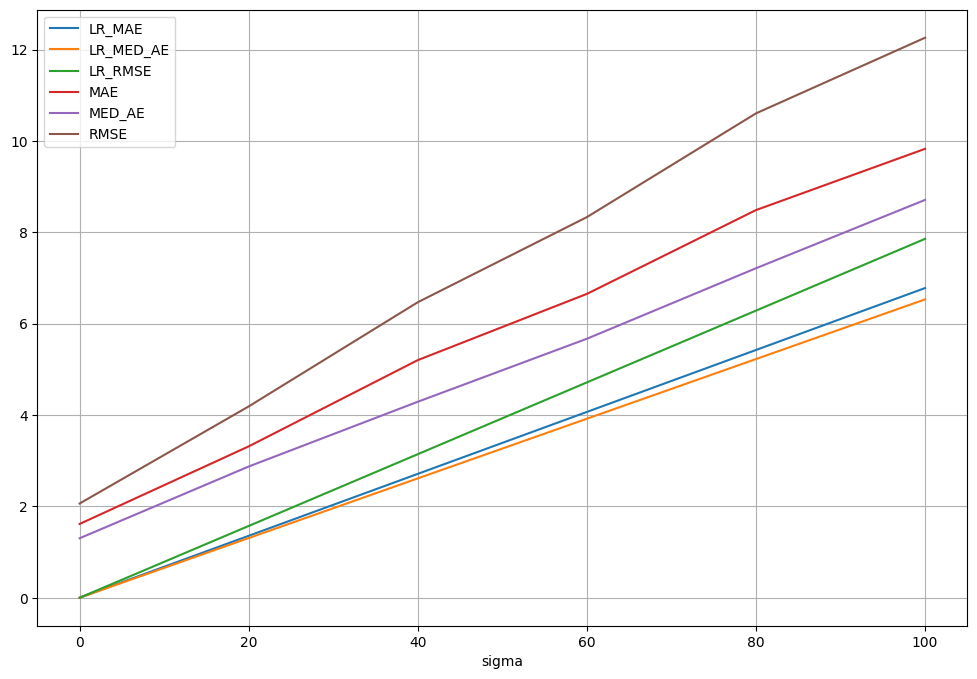

In [12]:
ax = None

for name, df_group in df_model_errors.groupby("metric"):
    ax = df_group.plot("sigma", "mu_x_i", ax=ax, label=name, figsize=(12, 8))

ax.grid()